In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [2]:
os.getcwd()

'/home/akshey/Desktop/PhD/Code_repositories/comparison-algorithms'

## Behaviour evaluation plots

/tmp/ipykernel_1566001/2390468831.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=40)


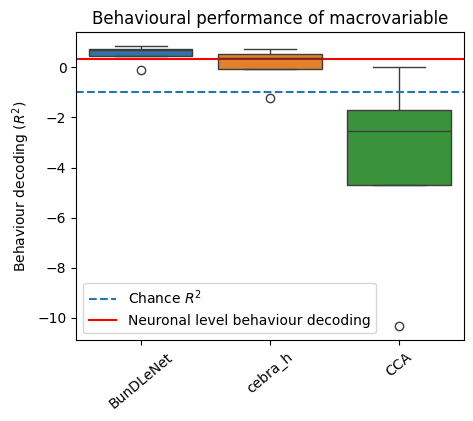

In [4]:
### POOLING RATS
algorithms = ['BunDLeNet', 'cebra_h', 'CCA']# ['BunDLeNet', 'cebra_h', 'CCA', 'PCA']
r2_array = []
for alg in algorithms:
    rat_i_r2 = []
    rat_chance_r2 = []
    rat_X_r2 = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_' + alg + '_rat_' +   rat_name)
        X_r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_X_rat_'+ rat_name).max()
        chance_r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_chance_rat_'+ rat_name).mean()
        rat_i_r2.append(r2.mean())
        rat_chance_r2.append(chance_r2)
        rat_X_r2.append(X_r2)
        
    r2_array.append(rat_i_r2)

r2_array = np.array(r2_array)
rat_chance_r2 = np.array(rat_chance_r2)
rat_X_r2 = np.array(rat_X_r2)


plt.figure(figsize=(5,4))
ax = sns.boxplot(data=r2_array.T)
ax.set_xticklabels(algorithms, rotation=40)
ax.set(ylabel = "Behaviour decoding ($R^2$)", title ='Behavioural performance of macrovariable')
ax.axhline(rat_chance_r2.mean(), linestyle='--',label='Chance $R^2$') ### Chance accuracy (see Evaluation .ipynb)
ax.axhline(rat_X_r2.mean(), linestyle='-',label='Neuronal level behaviour decoding', color='red') ### Chance accuracy (see Evaluation .ipynb)

ax.legend()

/tmp/ipykernel_1566001/2143182516.py:4: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.violinplot(data=r2_array.T, linewidth=1, palette=color_palette)
/tmp/ipykernel_1566001/2143182516.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=40, fontsize=11)


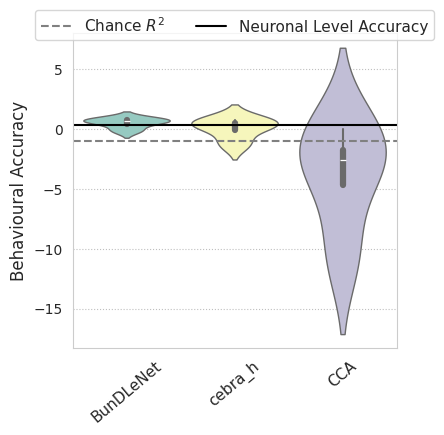

In [5]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 5))
ax = sns.violinplot(data=r2_array.T, linewidth=1, palette=color_palette)
ax.set_xticklabels(algorithms, rotation=40, fontsize=11)
ax.set_ylabel("Behavioural Accuracy", fontsize=12)
ax.axhline(rat_chance_r2.mean(), linestyle='--', label='Chance $R^2$', color='gray')
ax.axhline(rat_X_r2.mean(), linestyle='-', label='Neuronal Level Accuracy', color='black')
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#plt.savefig('Figures/behavioural_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [6]:
''' # Evaluations for each rat individually
for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
    acc_array = []
    algorithms = ['cebra_h', 'BunDLeNet']
    for alg in algorithms:
        acc_array.append( np.loadtxt('data/generated/evaluation_metrics/acc_list_' + alg + '_rat_' +  str(rat_name)) )
    acc_array = np.array(acc_array)
    ### Neuronal level accuracy (X)
    X_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_X_rat_'+str(rat_name)).max()
    chance_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_chance_rat_'+str(rat_name)).mean()



    plt.figure(figsize=(5,4))
    ax = sns.violinplot(data=acc_array.T[:,:7])
    ax.set_xticklabels(['CEBRA-h', 'BunDLe Net'], rotation=40)
    ax.set(ylabel = "Decoding accuracy", title ='Behavioural performance of macrovariable')
    ax.axhline(chance_r2, linestyle='--',label='Chance accuracy') ### Chance accuracy (see Evaluation .ipynb)
    ax.axhline(X_r2, linestyle='-',label='Neuronal level accuracy', color='red') ### Chance accuracy (see Evaluation .ipynb)

    ax.legend()
    plt.savefig('behavioural_performance.pdf', transparent=True)
'''

' # Evaluations for each rat individually\nfor rat_name in [\'achilles\', \'gatsby\',\'cicero\', \'buddy\']:\n    acc_array = []\n    algorithms = [\'cebra_h\', \'BunDLeNet\']\n    for alg in algorithms:\n        acc_array.append( np.loadtxt(\'data/generated/evaluation_metrics/acc_list_\' + alg + \'_rat_\' +  str(rat_name)) )\n    acc_array = np.array(acc_array)\n    ### Neuronal level accuracy (X)\n    X_r2 = np.loadtxt(\'data/generated/evaluation_metrics/acc_list_X_rat_\'+str(rat_name)).max()\n    chance_r2 = np.loadtxt(\'data/generated/evaluation_metrics/acc_list_chance_rat_\'+str(rat_name)).mean()\n\n\n\n    plt.figure(figsize=(5,4))\n    ax = sns.violinplot(data=acc_array.T[:,:7])\n    ax.set_xticklabels([\'CEBRA-h\', \'BunDLe Net\'], rotation=40)\n    ax.set(ylabel = "Decoding accuracy", title =\'Behavioural performance of macrovariable\')\n    ax.axhline(chance_r2, linestyle=\'--\',label=\'Chance accuracy\') ### Chance accuracy (see Evaluation .ipynb)\n    ax.axhline(X_r2, lines

## Dynamics evaluation plots

BunDLeNet achilles [0.03521247 0.03558969 0.03574904 0.03540211 0.03559157 0.03537938
 0.03507547 0.03504412 0.03561486 0.03523999]
BunDLeNet gatsby [0.00920778 0.00917049 0.00929539 0.008771   0.00917254 0.00899608
 0.00941754 0.00909177 0.00934532 0.00893876]
BunDLeNet cicero [0.0137723  0.01733444 0.01352964 0.01391463 0.01238933 0.0159328
 0.01220462 0.01621246 0.01484602 0.01473251]
BunDLeNet buddy [ 0.02203207 -0.01872596  0.01716424  0.02551648  0.01611815 -0.00155987
  0.0193804   0.01152139  0.01705703  0.01924846]
cebra_h achilles [0.00889495 0.00729095 0.00878618 0.00801909 0.00803361 0.00813285
 0.00829531 0.00811871 0.00768007 0.00825265]
cebra_h gatsby [0.02610342 0.0226087  0.02568247 0.02562347 0.02681916 0.0222624
 0.02664866 0.02459746 0.02511856 0.02568028]
cebra_h cicero [0.03651184 0.03736116 0.03890623 0.03873391 0.03872873 0.0397521
 0.03858761 0.03836201 0.03974745 0.0392646 ]
cebra_h buddy [0.03253616 0.03319313 0.0328669  0.03286642 0.03320911 0.03347252
 0.03

/tmp/ipykernel_1566001/578562180.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=90, fontsize=10)


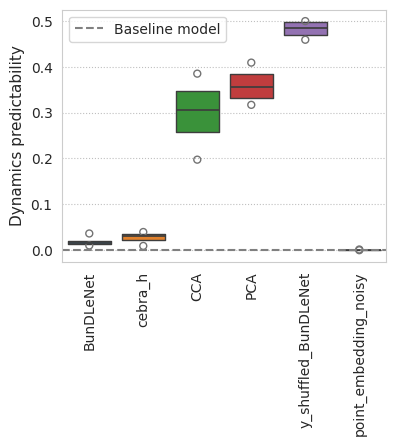

In [12]:
%matplotlib notebook
### POOLING ratS
'''
algorithms = ['cebra_h', 'BunDLeNet']
acc_array = []
for alg in algorithms:
    rat_i_r2 = []
    '''
algorithms = ['BunDLeNet', 'cebra_h', 'CCA', 'PCA', 'y_shuffled_BunDLeNet', 'point_embedding_noisy']
dp_array = []
for alg in algorithms:
    rat_i_dp = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        mse = np.loadtxt('data/generated/rat_evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name))
        dyn_pred = 1 -  mse[:,3]/mse[:,2]
        rat_i_dp.append(dyn_pred.mean())
        print(alg, rat_name, dyn_pred)

    dp_array.append(rat_i_dp)
    
dp_array = np.array(dp_array)


plt.figure(figsize=(4.5, 4))
ax = sns.boxenplot(data=dp_array.T, linewidth=1)
ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
ax.legend()

/tmp/ipykernel_1566001/3925546422.py:4: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax = sns.violinplot(data=dp_array.T[:6], linewidth=1, palette=color_palette)
/tmp/ipykernel_1566001/3925546422.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=40, fontsize=11)


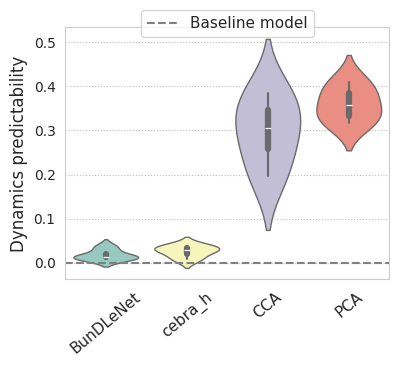

In [8]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=dp_array.T[:6], linewidth=1, palette=color_palette)
ax.set_xticklabels(algorithms, rotation=40, fontsize=11)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=12)

ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#plt.savefig('Figures/dynamical_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [7]:
''' # Evaluations for each rat individually
for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
    mse_array = []
    algorithms = ['cebra_h', 'BunDLeNet']
    for alg in algorithms:
        filename = 'data/generated/evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name)
        mse_array.append(np.loadtxt(filename))
    mse_array = np.array(mse_array)
    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]


    plt.figure(figsize=(4.5, 4))
    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)
    ax.set_xticklabels([ 'CEBRA-h' 'BunDLe-Net'], rotation=40, fontsize=10)
    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
    ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
    plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
    # Adjust the bottom margin
    plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
    ax.legend()
'''

' # Evaluations for each rat individually\nfor rat_name in ['achilles', 'gatsby','cicero', 'buddy']:\n    mse_array = []\n    algorithms = [\'PCA\', \'tsne\', \'cebra_h\', \'autoencoder\', \'ArAe\', \'BunDLeNet\']\n    for alg in algorithms:\n        filename = \'data/generated/evaluation_metrics/mse_list_\' + alg + \'_rat_\' +  str(rat_name)\n        mse_array.append(np.loadtxt(filename))\n    mse_array = np.array(mse_array)\n    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]\n\n\n    plt.figure(figsize=(4.5, 4))\n    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)\n    ax.set_xticklabels([\'PCA\', \'t-SNE\', \'CEBRA-h\', \'autoencoder\', \'ArAe\', \'BunDLe-Net\'], rotation=40, fontsize=10)\n    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)\n    ax.axhline(0.0, linestyle=\'--\',label=\'Baseline model\', color=\'gray\') ### Baseline goodness of fit (by definition)\n    plt.grid(axis=\'y\', linestyle=\':\', color=\'gray\', alpha=0.5)\n    # Adjust t